## pkl 파일 불러오기

In [2]:
import pickle
import pandas as pd

# 파일 경로
file_path = './doc2vec/vector_df_0510.pkl'

# 파일 불러오기 후 DataFrame으로 변환
with open(file_path, 'rb') as f:
    df = pickle.load(f)

df = pd.DataFrame(df)
print(f"✅ 파일 로드 및 DataFrame 변환 완료, shape: {df.shape}")

✅ 파일 로드 및 DataFrame 변환 완료, shape: (88766, 7)


In [2]:
df.head()

,source,search_words,url,title,contents,tagged_contents,vector
0,블로그,아기+잠깨,https://blog.naver.com/srhymin/223091161466,NaN,저희 아기는 신생아때부터 청각과 촉각이 예민해 잠도 깊게 못 잘 뿐더러 잠투정이 정...,"[저희, 아기, 신생아, 때, 청각, 촉각, 잠도, 못, 뿐더러, 잠투, 정이, 정...","[0.18305127, -1.2801502, -0.44998685, 0.799018..."
1,블로그,아기+잠깨,https://blog.naver.com/sukm83/223091879514,NaN,정신없는 주방한켠 뒤죽박죽 알 수 없는 용기에 양념과 소스가 담겨져 있기에 주방이 ...,"[정신, 방한, 뒤죽박죽, 알, 수, 용기, 양념, 소스, 주방, 이번, 양념, 통...","[3.5914354, -2.2061694, 1.5965343, 0.19793592,..."
2,블로그,아기+잠깨,https://blog.naver.com/dldptmf5134/223096875782,NaN,안녕하세요 지유맘입니다! 오늘은 지유가 이유식과 유아식 그 중간즈음 토핑식을 할 때...,"[지유, 맘, 오늘, 지유, 이유식, 유아식, 그, 중간, 즈음, 토핑식, 때, 정...","[0.3413881, -0.53281033, -1.3500248, 1.670243,..."
3,블로그,아기+잠깨,https://blog.naver.com/lia1100/223095799488,NaN,안녕하세요 라온엄마에요 오늘은 조금 특이한 아기 반찬을 준비했어요 방풍나물을 이용한...,"[엄마, 오늘, 조금, 아기, 반찬, 준비, 방, 나물, 이용, 방, 나물, 된장,...","[0.9519698, -1.2839632, -0.3893606, -0.1345413..."
4,블로그,아기+잠깨,https://blog.naver.com/perfect_aj/223095824533,NaN,6 12개월 아기의 1일 권장 물섭취량은 220ml정도라고 한다. 음 우래기는.. ...,"[개월, 아기, 권장, 물섭취량, 정도, 음, 우리, 애기, 생각, 물, 물병, 번...","[0.47277522, -0.9469169, 1.0451334, -0.1203481..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88766 entries, 0 to 88765
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   source           88766 non-null  object
 1   search_words     88766 non-null  object
 2   url              81327 non-null  object
 3   title            30446 non-null  object
 4   contents         88766 non-null  object
 5   tagged_contents  88766 non-null  object
 6   vector           88766 non-null  object
dtypes: object(7)
memory usage: 4.7+ MB


### 사용할 벡터 지정

In [18]:
doc_vectors = list(df['vector'])

## 노이즈 제거 & df 변수 재지정

- 2nd 클러스터링에서 1번 클러스터 삭제

In [5]:
df = pd.read_csv('/Users/cooru.i/Desktop/workspace/DX_1stepforward/doc2vec/2nd_pre_cluster_df.csv', encoding='utf-8-sig')

In [14]:
df2 = df[df['cluster'] == 0]
df2 = df2.drop(columns = ['cluster', 'Unnamed: 0'])
df2.head()

,source,url,date,title,contents,reply,tagged_contents,vector
0,kin,https://kin.naver.com/qna/detail.naver?d1id=7&...,2024.06.25,낮에 녹차프라페를 마셨는데 의도치않게 밤을 샜어요,얼마전에 오랜만에 녹차음료 마시고싶어서 집앞 카페에서 프라페 한잔을 다 먹었는데요 ...,NaN,"['얼마', '전', '만', '녹차', '음료', '집앞', '카페', '프라',...",[-7.63004040e-03 -1.73756123e+00 -6.63200319e-...
1,kin,https://kin.naver.com/qna/detail.naver?d1id=8&...,2024.06.19,다이어트 액상과당,제가 살이 너무 쪄서 다이어트를 해야 하는데 지금이 시험기간이거든요 근데 제가 잠이...,NaN,"['제', '살이', '다이어트', '지금', '시험', '기간', '제', '잠'...",[-9.4209152e-01 -2.4321429e-01 4.6306536e-01 ...
2,kin,https://kin.naver.com/qna/detail.naver?d1id=20...,2023.10.09,네가지꿈을 동시에 꾸는꿈,안녕하세요 평범한 고 남학생입니다. 제가 잠시 낮잠을 자면서 네가지꿈을 동시에 꾸었...,NaN,"['고', '남학생', '제', '잠시', '낮잠', '네가지', '꿈', '동시'...",[ 2.79765272e+00 -8.80736768e-01 -2.32857418e+...
3,kin,https://kin.naver.com/qna/detail.naver?d1id=3&...,2023.11.05,저승사자 나오는 꿈,낮잠을 잤는데 저승사자가 나오는 꿈을 꿨어요. 집이 층인데 검정 양복을 입은 남자가...,NaN,"['낮잠', '저승사자', '꿈', '집', '층', '검정', '양복', '남자'...",[ 0.884699 -0.7807027 0.2944493 -0.218511...
4,kin,https://kin.naver.com/qna/detail.naver?d1id=7&...,2025.03.17,자고일어났더니 죽는다는기분,제가 독감에 걸렸었을때 낮잠을 자고 깼는데 갑자기 죽는다는기분? 느낌? 이들면서 제...,NaN,"['제', '독감', '때', '낮잠', '자고', '갑자기', '기분', '느낌'...",[ 4.85674202e-01 8.58671814e-02 -1.83886558e-...


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45368 entries, 0 to 45378
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   source           45368 non-null  object
 1   url              5493 non-null   object
 2   date             1638 non-null   object
 3   title            45368 non-null  object
 4   contents         45368 non-null  object
 5   reply            206 non-null    object
 6   tagged_contents  45368 non-null  object
 7   vector           45368 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


## AgglomerativeClustering

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from tqdm import tqdm

### 엘보 메소드

- `linkage='average'`, `metric='cosine'`
- `linkage='complete'`, `metric='cosine'`

In [ ]:
# 실루엣 지수 구하기
n_cluster = []
cluster_score = []

for i in tqdm(range(2, 8)) :
    cluster = AgglomerativeClustering(n_clusters = i, linkage = 'average', metric = 'cosine')
    cluster_label = cluster.fit_predict(doc_vectors)
    score = silhouette_score(doc_vectors, cluster_label, metric='cosine')

    n_cluster.append(i) # 클러스터 수
    cluster_score.append(score) # 실루엣 점수

    print(f"Cluster: {i}, Silhouette Score: {score}")

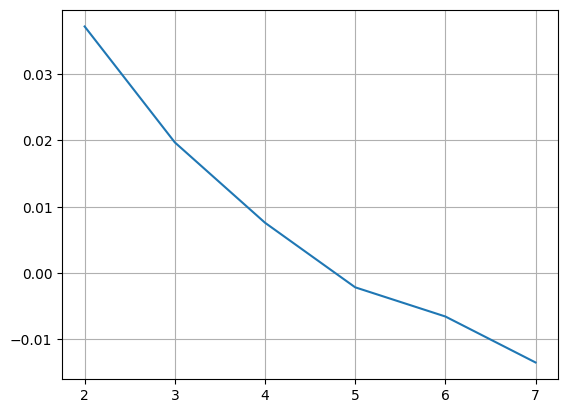

In [ ]:
# 시각화하기
plt.plot(n_cluster, cluster_score)
plt.grid()
plt.show()

### k값 지정 & 모델링

In [ ]:
import numpy as np

In [12]:
best_cluster = 4
cluster = AgglomerativeClustering(n_clusters = best_cluster, linkage = 'average', metric='cosine')
cluster_label = cluster.fit_predict(doc_vectors)

df['cluster'] = cluster_label

print(np.unique(df['cluster']))
df.head()

[0 1 2 3]


,source,url,date,title,contents,reply,tagged_contents,vector,cluster
0,kin,https://kin.naver.com/qna/detail.naver?d1id=7&...,2024.06.25,낮에 녹차프라페를 마셨는데 의도치않게 밤을 샜어요,얼마전에 오랜만에 녹차음료 마시고싶어서 집앞 카페에서 프라페 한잔을 다 먹었는데요 ...,NaN,"[얼마, 전, 만, 녹차, 음료, 집앞, 카페, 프라, 페, 한잔, 원래, 가끔, ...","[0.5336144, -0.07127508, -0.27102998, 0.766424...",2
1,kin,https://kin.naver.com/qna/detail.naver?d1id=8&...,2024.06.19,다이어트 액상과당,제가 살이 너무 쪄서 다이어트를 해야 하는데 지금이 시험기간이거든요 근데 제가 잠이...,NaN,"[제, 살이, 다이어트, 지금, 시험, 기간, 제, 잠, 커피, 꼭, 아아, 마시기...","[-0.5184307, 0.4065338, -0.2826834, 0.6624631,...",2
2,kin,https://kin.naver.com/qna/detail.naver?d1id=20...,2023.10.09,네가지꿈을 동시에 꾸는꿈,안녕하세요 평범한 고 남학생입니다. 제가 잠시 낮잠을 자면서 네가지꿈을 동시에 꾸었...,NaN,"[고, 남학생, 제, 잠시, 낮잠, 네가지, 꿈, 동시, 첫, 꿈, 제, 교회, 교...","[0.9302892, 0.3556157, 0.20767511, 1.2152838, ...",2
3,kin,https://kin.naver.com/qna/detail.naver?d1id=3&...,2023.11.05,저승사자 나오는 꿈,낮잠을 잤는데 저승사자가 나오는 꿈을 꿨어요. 집이 층인데 검정 양복을 입은 남자가...,NaN,"[낮잠, 저승사자, 꿈, 집, 층, 검정, 양복, 남자, 창문, 저, 그, 남자, ...","[0.28132784, 0.065864645, 0.101176165, 0.13691...",2
4,kin,https://kin.naver.com/qna/detail.naver?d1id=7&...,2025.03.17,자고일어났더니 죽는다는기분,제가 독감에 걸렸었을때 낮잠을 자고 깼는데 갑자기 죽는다는기분? 느낌? 이들면서 제...,NaN,"[제, 독감, 때, 낮잠, 자고, 갑자기, 기분, 느낌, 이, 제, 몸, 꿈, 느낌...","[0.07614179, 0.33333543, -0.05476251, -0.02159...",2


### 덴드로그램 시각화

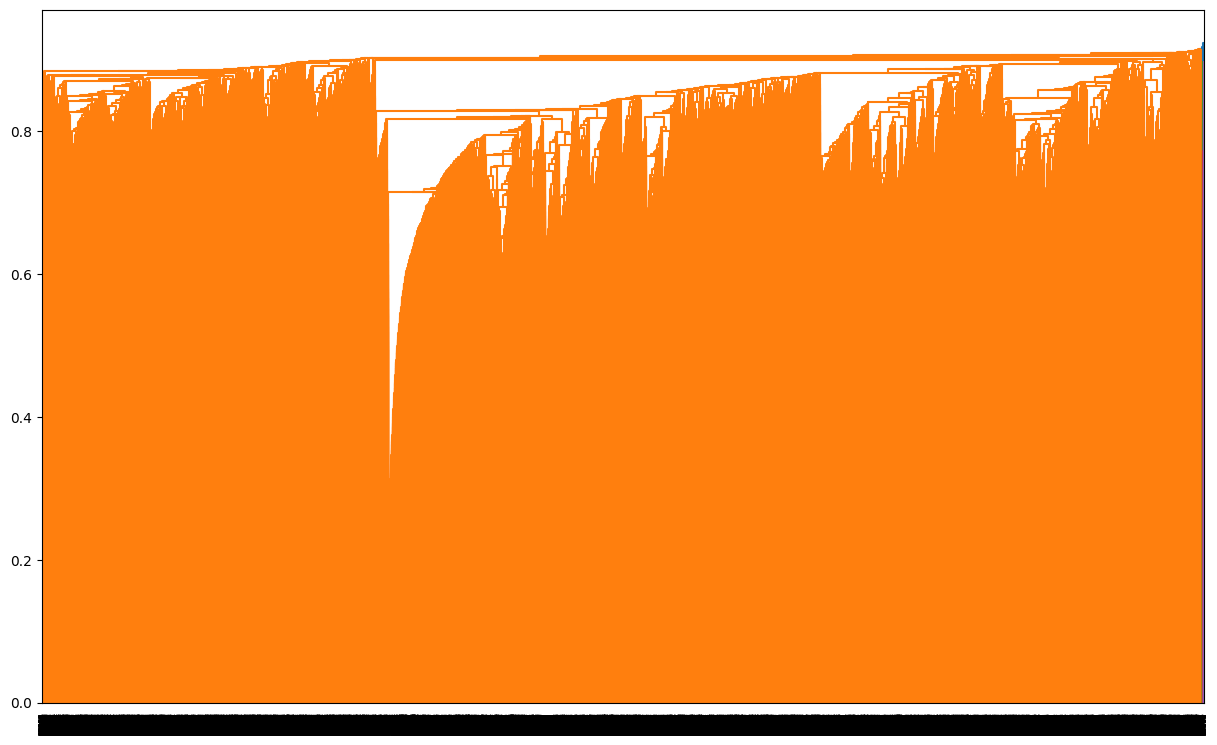

In [13]:
linked = linkage(doc_vectors, method = 'average', metric = 'cosine')

plt.figure(figsize = (15, 9))
dendrogram(linked,
           orientation = 'top',
           distance_sort = 'descending',
           show_leaf_counts = False,
           color_threshold = linked[-(best_cluster - 1), 2])
plt.show()

### 클러스터 정보 

In [14]:
df['cluster'].value_counts().sort_index()

cluster
0       14
1       16
2    45338
3       11
Name: count, dtype: int64

## KMeans

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### 엘보 메소드

In [34]:
# 코사인 기준 실루엣 점수
n_cluster = []
sil_score = []

for i in tqdm(range(2, 10)):
    kmeans_model = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans_labels = kmeans_model.fit_predict(doc_vectors)
    score = silhouette_score(doc_vectors, kmeans_labels, metric='cosine')

    n_cluster.append(i)
    sil_score.append(score)
    print(f'k={i}, silhouette score={sil_score}')

 12%|█▎        | 1/8 [00:21<02:33, 21.96s/it]

k=2, silhouette score=[0.030002723]


 25%|██▌       | 2/8 [00:42<02:06, 21.15s/it]

k=3, silhouette score=[0.030002723, 0.023621548]


 38%|███▊      | 3/8 [01:03<01:44, 20.93s/it]

k=4, silhouette score=[0.030002723, 0.023621548, 0.018583227]


 50%|█████     | 4/8 [01:24<01:23, 20.87s/it]

k=5, silhouette score=[0.030002723, 0.023621548, 0.018583227, 0.005820927]


 62%|██████▎   | 5/8 [01:44<01:02, 20.89s/it]

k=6, silhouette score=[0.030002723, 0.023621548, 0.018583227, 0.005820927, -0.011234368]


 75%|███████▌  | 6/8 [02:05<00:41, 20.64s/it]

k=7, silhouette score=[0.030002723, 0.023621548, 0.018583227, 0.005820927, -0.011234368, -0.008432188]


 88%|████████▊ | 7/8 [02:25<00:20, 20.43s/it]

k=8, silhouette score=[0.030002723, 0.023621548, 0.018583227, 0.005820927, -0.011234368, -0.008432188, -0.004240858]


100%|██████████| 8/8 [02:44<00:00, 20.56s/it]

k=9, silhouette score=[0.030002723, 0.023621548, 0.018583227, 0.005820927, -0.011234368, -0.008432188, -0.004240858, 0.00010331839]


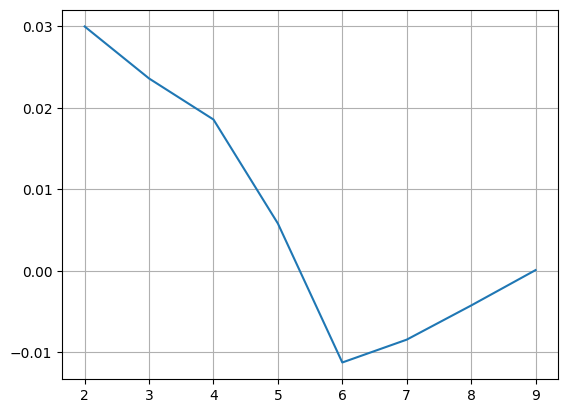

In [35]:
plt.plot(n_cluster, sil_score)
plt.grid()
plt.show()

### k값 지정 & 모델링

In [36]:
k = 2
kmeans_model_direct = KMeans(n_clusters=k, random_state=42, n_init='auto')
kmeans_labels_direct = kmeans_model_direct.fit_predict(doc_vectors)

### scatter 시각화

In [6]:
import numpy as np

In [3]:
import umap.umap_ as umap

/usr/local/Caskroom/miniconda/base/envs/dxschool/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# 벡터 추출 및 형태 확인
try:
    doc_vectors_array = np.array(doc_vectors)
    print(f"원본 Doc2Vec 벡터 shape: {doc_vectors_array.shape}")

    # K-Means 레이블 길이와 벡터 개수 일치 확인
    if len(kmeans_labels_direct) != doc_vectors_array.shape[0]:
        raise ValueError(f"K-Means 레이블 길이({len(kmeans_labels_direct)})와 벡터 개수({doc_vectors_array.shape[0]})가 불일치합니다!")

except Exception as e:
    print(f"데이터 준비 중 오류 발생: {e}")
    raise # 오류 발생시켜 중단

In [9]:
doc_vectors_array = np.array(doc_vectors)
print(f"원본 Doc2Vec 벡터 shape: {doc_vectors_array.shape}")

원본 Doc2Vec 벡터 shape: (88766, 200)


In [10]:
umap_model = umap.UMAP(n_neighbors=15,
                       n_components=2,
                       min_dist=0.1,
                       metric='cosine', # Doc2Vec에 적합
                       random_state=42,
                       verbose=False) # 간결하게 하려면 False

In [11]:
# 원본 벡터로 UMAP 학습 및 변환
umap_embedding = umap_model.fit_transform(doc_vectors_array)
print(f"UMAP 차원 축소 완료. 축소된 임베딩 shape: {umap_embedding.shape}")

/usr/local/Caskroom/miniconda/base/envs/dxschool/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/dxschool/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP 차원 축소 완료. 축소된 임베딩 shape: (88766, 2)


In [ ]:
# UMAP 결과로 DataFrame 생성
umap_df = pd.DataFrame(umap_embedding, columns=['umap_x', 'umap_y'])

# 이전에 생성된 K-Means 레이블('kmeans_labels_direct')을 새 컬럼으로 추가
umap_df['kmeans_cluster'] = kmeans_labels_direct

print("umap_df 생성 및 K-Means 레이블 추가 완료.")
print("umap_df shape:", umap_df.shape)
print("\numap_df head:")
print(umap_df.head())

umap_df shape: (88766, 2)

umap_df head:
     umap_x    umap_y
0  2.414665  1.605893
1 -3.148386 -0.240044
2 -3.018861 -0.708719
3 -3.009491 -0.874074
4  0.426729  2.627305



결과 시각화 (umap_df 사용)...


/var/folders/_j/ygr94mmx6rs09px9_pzz74100000gn/T/ipykernel_77342/3358363116.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(umap_df['umap_x'],


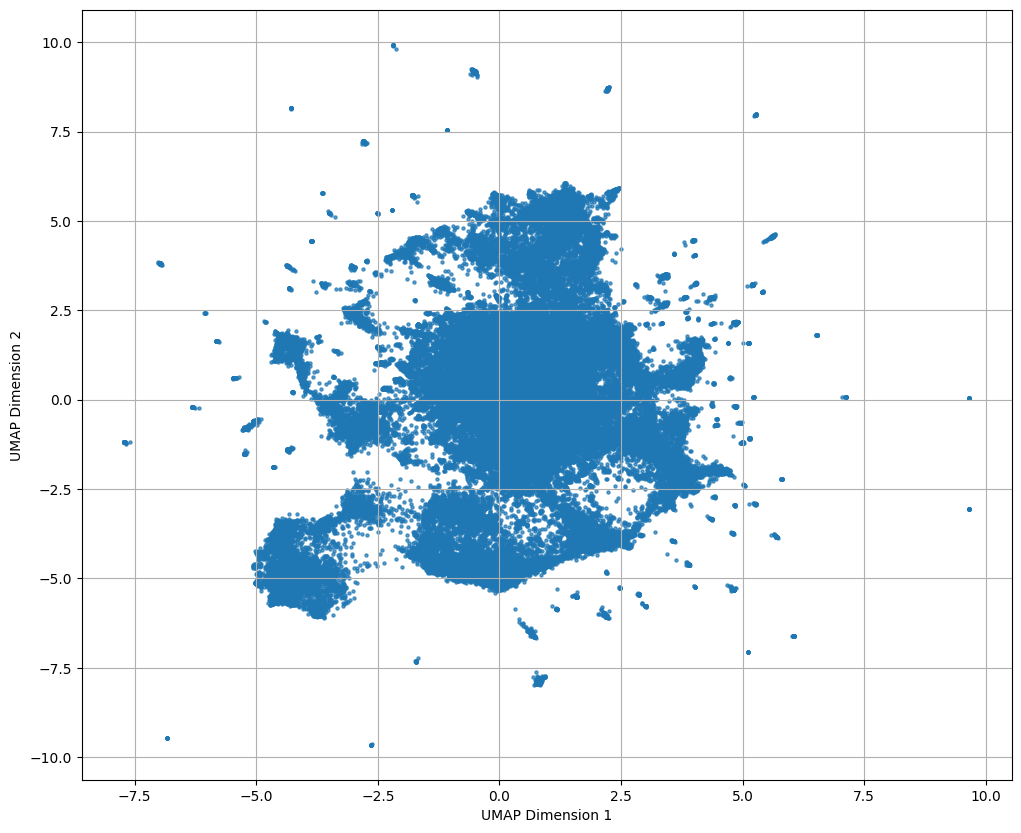

In [ ]:
print("\n결과 시각화 (umap_df 사용)...")

k = umap_df['kmeans_cluster'].nunique()
print(f"시각화할 클러스터 개수 (기존 K-Means 결과 기준): {k}")

plt.figure(figsize=(12, 10))
scatter = plt.scatter(umap_df['umap_x'],
                      umap_df['umap_y'],
                      c=umap_df['kmeans_cluster'], # umap_df의 클러스터 레이블 사용
                      cmap='Spectral',
                      s=5,
                      alpha=0.7)

plt.title(f'Original K-Means Clusters (k={k}) Projected onto UMAP Space', fontsize=16)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.grid(True)

try:
    handles, labels = scatter.legend_elements(prop="colors", alpha=0.9)
    unique_labels = sorted(umap_df['kmeans_cluster'].unique()) # 실제 레이블 값 사용
    legend_labels = [f'Cluster {i}' for i in unique_labels]
    plt.legend(handles, legend_labels, title="Orig. K-Means Clusters", loc='best', markerscale=1.5)
except Exception as e:
    print(f"범례 생성 중 오류 발생: {e}")

plt.show()

In [53]:
# --- UMAP 공간에서의 실루엣 점수 계산 ---
# 이 점수는 원본 K-Means 결과가 UMAP 공간에서 얼마나 잘 분리되는지 보여줌
try:
    umap_coords = umap_df[['umap_x', 'umap_y']].values
    silhouette_avg_umap = silhouette_score(umap_coords, umap_df['kmeans_cluster']) # 유클리드 거리 사용
    print(f"\n원본 K-Means 레이블의 UMAP 공간 실루엣 점수 (유클리드): {silhouette_avg_umap:.4f}")
except ValueError as e:
     print(f"\n실루엣 점수 계산 오류: {e}")


원본 K-Means 레이블의 UMAP 공간 실루엣 점수 (유클리드): 0.1736


### 클러스터 정보

In [37]:
df['kmeans_cluster'] = kmeans_labels_direct
df['kmeans_cluster'].value_counts()

kmeans_cluster
0    29373
1    16006
Name: count, dtype: int64

## KMeans on UMAP

### 차원축소한 벡터 추출

In [17]:
if 'umap_embedding' in locals() and isinstance(umap_embedding, np.ndarray) and umap_embedding.shape[1] == 2:
    X_umap = umap_embedding
    print(f"UMAP 임베딩 사용. Shape: {X_umap.shape}")
elif 'df' in locals() and 'umap_x' in df.columns and 'umap_y' in df.columns:
    try:
        X_umap = df[['umap_x', 'umap_y']].values
        print(f"DataFrame에서 UMAP 좌표 추출. Shape: {X_umap.shape}")
    except Exception as e:
        print(f"DataFrame에서 UMAP 좌표 추출 중 오류: {e}")
        raise # 오류 발생시켜 중단
else:
    print("오류: UMAP 좌표 데이터('umap_embedding' 또는 df[['umap_x','umap_y']])를 찾을 수 없습니다.")
    raise NameError("UMAP 데이터 없음")

UMAP 임베딩 사용. Shape: (88766, 2)


### 엘보 메소드

In [21]:
k_range = range(2, 11) # 테스트할 k의 범위 (예: 2부터 10까지)
inertias = []
silhouette_scores = []

print(f"\n최적의 k 탐색 중 (k={min(k_range)}부터 k={max(k_range)}까지)...")

for k in tqdm(k_range):
    # K-Means 모델 생성 및 학습
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels_temp = kmeans_temp.fit_predict(X_umap)

    # a) 관성 (Inertia / WCSS) 계산 - Elbow Method 용
    inertias.append(kmeans_temp.inertia_)

    # b) 실루엣 점수 계산 (UMAP 공간의 유클리드 거리 기준)
    try:
        if len(np.unique(labels_temp)) > 1: # 클러스터가 1개 이상일 때만 계산
             score = silhouette_score(X_umap, labels_temp, metric='euclidean') # UMAP 공간이므로 유클리드 사용
             silhouette_scores.append(score)
        else:
             silhouette_scores.append(np.nan) # 계산 불가 시 NaN
    except MemoryError:
        print(f"k={k}, 실루엣 점수 계산 중 메모리 오류 발생.")
        silhouette_scores.append(np.nan)
        # 필요시 여기서 break

print("\nk값 탐색 완료.")


최적의 k 탐색 중 (k=2부터 k=10까지)...


100%|██████████| 9/9 [08:03<00:00, 53.70s/it]


k값 탐색 완료.


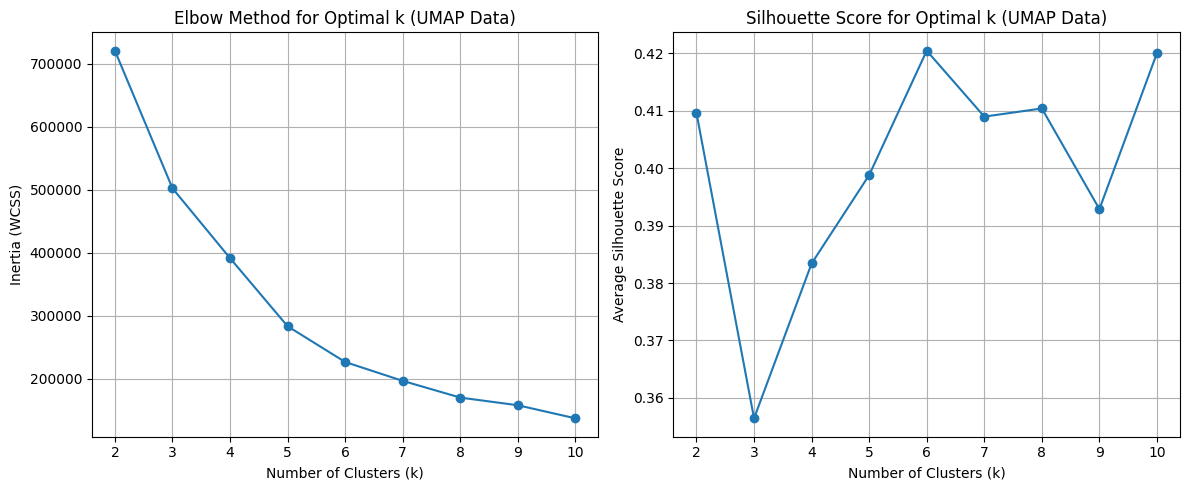

In [22]:
plt.figure(figsize=(12, 5))

# a) Elbow Method 그래프
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal k (UMAP Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)

# b) Silhouette Score 그래프
plt.subplot(1, 2, 2)
valid_indices = ~np.isnan(silhouette_scores) # NaN 값 제외
valid_k = np.array(list(k_range))[valid_indices]
valid_scores = np.array(silhouette_scores)[valid_indices]
if len(valid_scores) > 0:
    plt.plot(valid_k, valid_scores, marker='o')
    plt.title('Silhouette Score for Optimal k (UMAP Data)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Average Silhouette Score')
    plt.xticks(valid_k)
    plt.grid(True)
else:
    plt.text(0.5, 0.5, 'No valid silhouette scores calculated.', ha='center', va='center')

plt.tight_layout()
plt.show()

### k값 지정 & 모델링

In [23]:
chosen_k = 6
print(f"\n그래프 분석 결과, 최적 k = {chosen_k} 로 K-Means 최종 실행...")

kmeans_final = KMeans(n_clusters=chosen_k, random_state=42, n_init='auto')
final_labels = kmeans_final.fit_predict(X_umap)


그래프 분석 결과, 최적 k = 6 로 K-Means 최종 실행...


### 클러스터 정보

In [24]:
if 'df' in locals():
    df['umap_kmeans_cluster'] = final_labels
    umap_df['umap_kmeans_cluster'] = final_labels
    print(f"\nDataFrame 'df'에 UMAP 기반 K-Means 결과 ('umap_kmeans_cluster') 추가 완료.")
    # 클러스터별 개수 확인
    print("\n최종 클러스터별 데이터 개수:")
    print(df['umap_kmeans_cluster'].value_counts().sort_index())
    print("\ndf head (with new cluster):")
else:
    # df가 없다면 umap_df를 만들고 추가
    umap_df = pd.DataFrame(X_umap, columns=['umap_x', 'umap_y'])
    umap_df['umap_kmeans_cluster'] = final_labels
    print(f"\n새로운 DataFrame 'umap_df' 생성 및 K-Means 결과 ('umap_kmeans_cluster') 추가 완료.")
    print("\n최종 클러스터별 데이터 개수:")
    print(umap_df['umap_kmeans_cluster'].value_counts().sort_index())
    print("\numap_df head:")
    print(umap_df.head())


DataFrame 'df'에 UMAP 기반 K-Means 결과 ('umap_kmeans_cluster') 추가 완료.

최종 클러스터별 데이터 개수:
umap_kmeans_cluster
0    16292
1     8512
2     8824
3    27051
4    14093
5    13994
Name: count, dtype: int64

df head (with new cluster):


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88766 entries, 0 to 88765
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   source               88766 non-null  object
 1   search_words         88766 non-null  object
 2   url                  81327 non-null  object
 3   title                30446 non-null  object
 4   contents             88766 non-null  object
 5   tagged_contents      88766 non-null  object
 6   vector               88766 non-null  object
 7   umap_kmeans_cluster  88766 non-null  int32 
dtypes: int32(1), object(7)
memory usage: 5.1+ MB


In [26]:
umap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88766 entries, 0 to 88765
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   umap_x               88766 non-null  float32
 1   umap_y               88766 non-null  float32
 2   umap_kmeans_cluster  88766 non-null  int32  
dtypes: float32(2), int32(1)
memory usage: 1.0 MB


### scatter 시각화


최종 K-Means 결과 시각화...


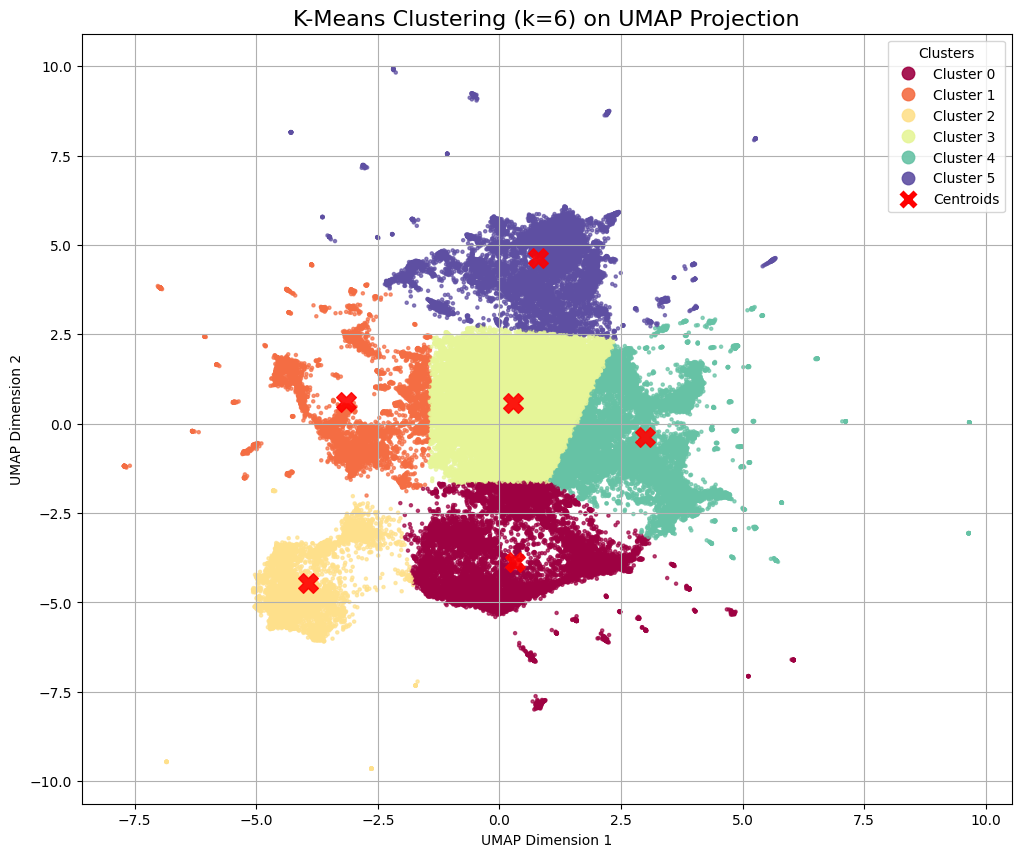

In [27]:
print("\n최종 K-Means 결과 시각화...")
plt.figure(figsize=(12, 10))

scatter_data_x = umap_df['umap_x']
scatter_data_y = umap_df['umap_y']
scatter_colors = umap_df['umap_kmeans_cluster']

scatter = plt.scatter(scatter_data_x,
                      scatter_data_y,
                      c=scatter_colors,
                      cmap='Spectral',
                      s=5,
                      alpha=0.7)

# 중심점 표시
centers = kmeans_final.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9, marker='X', label='Centroids')

plt.title(f'K-Means Clustering (k={chosen_k}) on UMAP Projection', fontsize=16)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.grid(True)

# 범례 추가
try:
    handles, labels = scatter.legend_elements(prop="colors", alpha=0.9)
    unique_labels = sorted(np.unique(final_labels))
    legend_labels = [f'Cluster {i}' for i in unique_labels]
    centroid_handle = plt.Line2D([0], [0], marker='X', color='w', label='Centroids',
                                     markerfacecolor='red', markersize=10)
    handles.append(centroid_handle)
    legend_labels.append('Centroids')
    plt.legend(handles, legend_labels, title="Clusters", loc='best', markerscale=1.5)
except Exception as e:
    print(f"범례 생성 중 오류 발생: {e}")

plt.show()

## TF-IDF

In [28]:
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

### 클러스터 단위 도큐먼트 만들기

In [29]:
all_documents = []
for i in df['umap_kmeans_cluster'].unique() :
    pos_tagged = df[df['umap_kmeans_cluster'] == i]['tagged_contents'] # 각 클러스터들을 하나의 문서로 가정

    # 하나의 string 으로 변환
    cluster_document = ''
    for pos in pos_tagged :
        doc = ' '.join(pos) + ' ' # 마지막에 띄어쓰기 추가
        cluster_document += doc

    all_documents.append(cluster_document)

### tf-idf 값 계산

In [30]:
# TF-IDF 객체 선언
vectorizer = TfidfVectorizer(ngram_range=(1, 2)) # bigram 사용
tfidf_matrix = vectorizer.fit_transform(all_documents)

# 사용될 단어
feature_names = vectorizer.get_feature_names_out()
# tfidf 값
value = tfidf_matrix.toarray()

# 데이터 프레임화
tfidf_df = pd.DataFrame(value, columns = feature_names)
tfidf_df

,가가,가가 가가,가가 가각,가가 가갸갸갸,가가 가격,가가 가기,가가 가까이,가가 가도,가가 가드,가가 가득,...,힝힝 채연,힝힝 출근,힝힝 키즈,힝힝 한번,힝힝 헝헝,힝힝 홍홍,힝힝 회색말,힝힝 후기,힝힝 흉내,힝힝 힝구
0,0.001745,0.000047,0.000000,0.00000,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000013,0.000000,0.000000,0.000000
1,0.001679,0.000000,0.000000,0.00000,0.000000,0.000026,0.000026,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000582,0.000008,0.000000,0.00000,0.000024,0.000000,0.000000,0.000000,0.000012,0.000010,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.001601,0.000045,0.000013,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000013,0.000013,0.000013,0.00000,0.00000,0.000013,0.000000,0.000013,0.000013,0.000000
4,0.000964,0.000000,0.000000,0.00001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008,...,0.000000,0.000000,0.000000,0.00001,0.00001,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000820,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000023


In [31]:
# Transpose
tfidf_df_T = tfidf_df.T
tfidf_df_T

,0,1,2,3,4,5
가가,0.001745,0.001679,0.000582,0.001601,0.000964,0.000820
가가 가가,0.000047,0.000000,0.000008,0.000045,0.000000,0.000000
가가 가각,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000
가가 가갸갸갸,0.000000,0.000000,0.000000,0.000000,0.000010,0.000000
가가 가격,0.000000,0.000000,0.000024,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
힝힝 홍홍,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000
힝힝 회색말,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000
힝힝 후기,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000
힝힝 흉내,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000


### 주요 단어 확인

In [32]:
tfidf_df_T[0].sort_values(ascending = False)[ : 20]

아기    0.395017
아이    0.282253
시간    0.216664
우리    0.208631
엄마    0.202917
사람    0.191221
낮잠    0.186929
생각    0.183379
개월    0.137017
육아    0.127216
시작    0.118764
때문    0.111963
오늘    0.109793
마음    0.103709
수면    0.099483
정도    0.098694
남편    0.092580
다시    0.092210
하나    0.085235
정말    0.084356
Name: 0, dtype: float64

In [33]:
tfidf_df_T[1].sort_values(ascending = False)[ : 20]

아기     0.455940
엄마     0.254701
이유식    0.212387
사진     0.193159
오늘     0.179261
우리     0.164138
육아     0.151265
개월     0.149329
낮잠     0.148816
아이     0.142380
시간     0.139115
아빠     0.127525
촬영     0.126033
재생     0.105919
생각     0.094399
정도     0.094143
아침     0.086844
준비     0.086062
시작     0.085013
일기     0.083509
Name: 1, dtype: float64

In [34]:
tfidf_df_T[2].sort_values(ascending = False)[ : 20]

아기         0.459900
이불         0.415393
낮잠         0.376251
사용         0.261764
낮잠 이불      0.259835
아이         0.150701
어린이집       0.144376
베개         0.133487
엄마         0.102797
제품         0.100911
우리         0.095739
육아         0.086528
패드         0.085075
신생아        0.073550
정말         0.072444
추천         0.072359
세탁         0.071365
매트         0.069778
생각         0.068784
어린이집 낮잠    0.065344
Name: 2, dtype: float64

In [35]:
tfidf_df_T[3].sort_values(ascending = False)[ : 20]

아기    0.368496
우리    0.244946
진짜    0.207676
엄마    0.206700
시간    0.190289
사진    0.184854
아이    0.158334
생각    0.129657
여행    0.128515
육아    0.127252
오늘    0.123831
아빠    0.123802
사람    0.123050
개월    0.119790
정말    0.108533
카페    0.107902
바로    0.106381
재생    0.103362
여기    0.102162
하나    0.098081
Name: 3, dtype: float64

In [36]:
tfidf_df_T[4].sort_values(ascending = False)[ : 20]

아기       0.522569
낮잠       0.326294
엄마       0.249018
개월       0.244410
시간       0.189283
육아       0.186333
우리       0.141555
오늘       0.135924
수유       0.133449
시작       0.121785
아빠       0.109011
이유식      0.104367
수면       0.100494
개월 아기    0.097197
이제       0.094091
하루       0.084241
정도       0.084131
밤잠       0.083889
생각       0.082460
다시       0.079564
Name: 4, dtype: float64

In [37]:
tfidf_df_T[5].sort_values(ascending = False)[ : 20]

맛집     0.436232
메뉴     0.224590
주문     0.196534
고기     0.189099
아기     0.180234
카페     0.155200
테이블    0.129195
정말     0.125613
소스     0.125352
진짜     0.124382
방문     0.117938
시간     0.113956
주차     0.106482
식사     0.099307
서울     0.096025
하나     0.093734
바로     0.092854
추천     0.090893
아이     0.090372
식당     0.089532
Name: 5, dtype: float64

### csv로 저장

In [79]:
for i in tfidf_df_T.columns :
    # 필터링해서 점수 높은 순으로 정렬하기
    tfidf_data = tfidf_df_T[i].sort_values(ascending = False)
    # 정렬한 데이터를 데이터프레임화 하기
    data_df = pd.DataFrame({'tfidf_word' : tfidf_data.index,
                            'tfidf_score' : tfidf_data.values })
    data_df.to_csv(f'5th_pre_cluster{i}_tfidf.csv', encoding = 'utf-8')

In [80]:
df.to_csv('5th_pre_cluster_df.csv', encoding='utf-8')

In [45]:
df[df['kmeans_cluster']==0]['contents']

1        제가 살이 너무 쪄서 다이어트를 해야 하는데 지금이 시험기간이거든요 근데 제가 잠이...
3        낮잠을 잤는데 저승사자가 나오는 꿈을 꿨어요. 집이 층인데 검정 양복을 입은 남자가...
4        제가 독감에 걸렸었을때 낮잠을 자고 깼는데 갑자기 죽는다는기분? 느낌? 이들면서 제...
11       제가 기간제 고정석으로 스터디카페를 이용중인데요. 제 뒤에 앉으시는 고정석 남자분 ...
12       제가 어렸을때부터 한쪽눈에먼 쌍꺼풀이 생겼다 안생겼다를 반복하고있습니다. 오랫동안 ...
                               ...                        
45312    빌캠 종료되면 핸드폰으로 알람 오는데 이거 하브 배터리가 없어도 알람 오는 건가요?...
45314     내가 느끼기에 불만이 많아지는것같아요 예를들어 식당 어딜가도 뭐가 맘에안들다 반찬...
45318    안녕하세요 부산 신입 사쿠라 입니더. 주말 날씨도 안좋고 카페도 들어와 보니 조용하...
45328    직장 내 성희롱으로 노동부에 진정을 당했습니다 저는 성희롱 비슷한말을 한 적이 없는...
45366    아니 그걸 진짜 한다고? 뭐 어때 일단 해봐야지 하 형 지난번에도 그랬다가 어떻게 ...
Name: contents, Length: 29373, dtype: object

In [46]:
df[df['kmeans_cluster']==1]['contents']

0        얼마전에 오랜만에 녹차음료 마시고싶어서 집앞 카페에서 프라페 한잔을 다 먹었는데요 ...
2        안녕하세요 평범한 고 남학생입니다. 제가 잠시 낮잠을 자면서 네가지꿈을 동시에 꾸었...
5        의부증으로 이혼상담 받아보신 분들 있으세요? 이게 그냥 질투하고 의심하는 수준이 아...
6         년 전 쯤 부터 수면중 심장이 두근거립니다. 낮잠잘 때는 더 심한거같아요 심장이 ...
7        안녕하시요 저는 수능이 일도 남지 않은 고 입니다. 개인의 필기와 여러가지교재들과 ...
                               ...                        
45374     하나님의 사역 출 오늘 성경에 보면 모세의 장인 이드로가 국가 경영을 하는 모세에...
45375     의 열 단 장 약산 김 원 봉 선생 월북하여 북한의 정치인이 되다 김원봉 년 월 ...
45376    자신감이 부족하다 생각하는 햏자들 보시오 밑에 보아하니 자신감 대인 관계 기피 등등...
45377     클리셰의 일종. 해당되는 인물들은 가족이나 일체의 혈연 친구와 같은 사회적 관계와...
45378    https www.youtube.com watch?v RKCym srEz 네 어느 ...
Name: contents, Length: 16006, dtype: object

## 노이즈 제거 & 파일 저장

In [81]:
df.head()

,source,url,date,title,contents,reply,tagged_contents,vector,cluster,kmeans_cluster,umap_kmeans_cluster
0,kin,https://kin.naver.com/qna/detail.naver?d1id=7&...,2024.06.25,낮에 녹차프라페를 마셨는데 의도치않게 밤을 샜어요,얼마전에 오랜만에 녹차음료 마시고싶어서 집앞 카페에서 프라페 한잔을 다 먹었는데요 ...,NaN,"[얼마, 전, 만, 녹차, 음료, 집앞, 카페, 프라, 페, 한잔, 원래, 가끔, ...","[0.5336144, -0.07127508, -0.27102998, 0.766424...",2,1,0
1,kin,https://kin.naver.com/qna/detail.naver?d1id=8&...,2024.06.19,다이어트 액상과당,제가 살이 너무 쪄서 다이어트를 해야 하는데 지금이 시험기간이거든요 근데 제가 잠이...,NaN,"[제, 살이, 다이어트, 지금, 시험, 기간, 제, 잠, 커피, 꼭, 아아, 마시기...","[-0.5184307, 0.4065338, -0.2826834, 0.6624631,...",2,0,2
2,kin,https://kin.naver.com/qna/detail.naver?d1id=20...,2023.10.09,네가지꿈을 동시에 꾸는꿈,안녕하세요 평범한 고 남학생입니다. 제가 잠시 낮잠을 자면서 네가지꿈을 동시에 꾸었...,NaN,"[고, 남학생, 제, 잠시, 낮잠, 네가지, 꿈, 동시, 첫, 꿈, 제, 교회, 교...","[0.9302892, 0.3556157, 0.20767511, 1.2152838, ...",2,1,2
3,kin,https://kin.naver.com/qna/detail.naver?d1id=3&...,2023.11.05,저승사자 나오는 꿈,낮잠을 잤는데 저승사자가 나오는 꿈을 꿨어요. 집이 층인데 검정 양복을 입은 남자가...,NaN,"[낮잠, 저승사자, 꿈, 집, 층, 검정, 양복, 남자, 창문, 저, 그, 남자, ...","[0.28132784, 0.065864645, 0.101176165, 0.13691...",2,0,2
4,kin,https://kin.naver.com/qna/detail.naver?d1id=7&...,2025.03.17,자고일어났더니 죽는다는기분,제가 독감에 걸렸었을때 낮잠을 자고 깼는데 갑자기 죽는다는기분? 느낌? 이들면서 제...,NaN,"[제, 독감, 때, 낮잠, 자고, 갑자기, 기분, 느낌, 이, 제, 몸, 꿈, 느낌...","[0.07614179, 0.33333543, -0.05476251, -0.02159...",2,0,2


In [82]:
# 제외할 클러스터 번호 리스트
clusters_to_exclude = [2, 4]

# 'umap_kmeans_cluster' 컬럼이 존재하는지 확인
if 'umap_kmeans_cluster' in df.columns:
    # .isin()으로 제외할 클러스터에 해당하는 행을 찾음 (True)
    # ~ 연산자로 이 조건을 반전시켜 제외할 클러스터가 *아닌* 행만 선택 (True)
    final_df = df[~df['umap_kmeans_cluster'].isin(clusters_to_exclude)].copy()

    print(f"원본 DataFrame 행 수: {len(df)}")
    print(f"제외할 클러스터({clusters_to_exclude})에 속한 행 수: {len(df[df['umap_kmeans_cluster'].isin(clusters_to_exclude)])}")
    print(f"final_df 생성 완료. 최종 행 수: {len(final_df)}")

    # 결과 확인 (final_df의 umap_kmeans_cluster 값 확인)
    print("\nfinal_df의 'umap_kmeans_cluster' 고유값 확인:")
    print(final_df['umap_kmeans_cluster'].unique())

    print("\nfinal_df head:")
    print(final_df.head())

else:
    print("오류: DataFrame 'df'에 'umap_kmeans_cluster' 컬럼이 없습니다.")

원본 DataFrame 행 수: 45379
제외할 클러스터([2, 4])에 속한 행 수: 15016
final_df 생성 완료. 최종 행 수: 30363

final_df의 'umap_kmeans_cluster' 고유값 확인:
[0 1 3 5]

final_df head:
   source                                                url        date  \
0     kin  https://kin.naver.com/qna/detail.naver?d1id=7&...  2024.06.25   
6     kin  https://kin.naver.com/qna/detail.naver?d1id=7&...  2025.01.14   
9     kin  https://kin.naver.com/qna/detail.naver?d1id=12...  2023.07.12   
10    kin  https://kin.naver.com/qna/detail.naver?d1id=12...  2024.07.12   
12    kin  https://kin.naver.com/qna/detail.naver?d1id=7&...  2024.03.27   

                          title  \
0   낮에 녹차프라페를 마셨는데 의도치않게 밤을 샜어요   
6             심장 두근거리고 온 몸이 힘빠짐   
9                 낮잠 장소 추천해주세요.   
10                    검은고양이 꿈해몽   
12             쌍꺼풀 생겼다 사라졌다를 반복   

                                             contents reply  \
0   얼마전에 오랜만에 녹차음료 마시고싶어서 집앞 카페에서 프라페 한잔을 다 먹었는데요 ...   NaN   
6    년 전 쯤 부터 수면중 심장이 두근거립니다. 낮잠잘 때는 더 심한거같아요 심장이 ...

In [83]:
# 'umap_kmeans_cluster' 컬럼이 있는지 확인
if 'umap_kmeans_cluster' in final_df.columns:

    print("Remapping 시작 전 'umap_kmeans_cluster' 고유값:")
    original_labels = sorted(final_df['umap_kmeans_cluster'].unique())
    print(original_labels) # [0, 1, 3, 5]

    # 1. category 타입으로 변환 후 .cat.codes를 *직접 할당*
    # (0 -> 0, 1 -> 1, 3 -> 2, 5 -> 3 과 같이 매핑됨)
    # .cat.codes는 final_df의 각 행에 해당하는 새로운 정수 코드를 반환합니다.
    # 이 Series의 길이는 final_df의 행 개수와 정확히 같습니다.
    final_df['final_cluster'] = final_df['umap_kmeans_cluster'].astype('category').cat.codes

    print("\nRemapping 완료 후 'final_cluster' 고유값:")
    new_unique_codes = sorted(final_df['final_cluster'].unique())
    print(new_unique_codes) # 결과: [0, 1, 2, 3]

    # 결과 확인 (처음 몇 행 비교)
    print("\n결과 비교 (처음 5행):")
    print(final_df[['umap_kmeans_cluster', 'final_cluster']].head())

else:
    print("오류: DataFrame 'final_df'에 'umap_kmeans_cluster' 컬럼이 없습니다.")

Remapping 시작 전 'umap_kmeans_cluster' 고유값:
[0, 1, 3, 5]

Remapping 완료 후 'final_cluster' 고유값:
[0, 1, 2, 3]

결과 비교 (처음 5행):
    umap_kmeans_cluster  final_cluster
0                     0              0
6                     1              1
9                     1              1
10                    3              2
12                    0              0


In [84]:
final_df.to_csv('final_df_0505.csv', encoding='utf-8-sig', index=False)

# 기타 코드

## df 수정

In [37]:
# 기존 클러스터 결과 중 일부(0, 1, 4 클러스터)만 사용하기
df2 = df.copy()
df2 = df2[df2['cluster'].isin([0, 1, 4])]
df2.shape

(22478, 7)

In [47]:
doc_vectors = list(df2['vector'])

## 차원축소

In [6]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

/usr/local/Caskroom/miniconda/base/envs/dxschool/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
doc_vectors = list(df['vector'])
n_samples = len(doc_vectors)
print(f"총 {n_samples}개의 Doc2Vec 벡터를 사용합니다.")

총 22834개의 Doc2Vec 벡터를 사용합니다.


In [23]:
# UMAP 모델 설정 및 학습
# n_components=2: 시각화를 위해 2차원으로 축소합니다.
# metric='cosine': Doc2Vec과 같은 임베딩 벡터에는 유클리드 거리보다 코사인 거리가 더 적합합니다.
# n_neighbors: 지역적 구조와 전역적 구조 간의 균형을 조절합니다. 기본값 15를 사용하거나 데이터 특성에 맞게 조절할 수 있습니다.
# min_dist: 저차원 공간에서 점들이 얼마나 가깝게 뭉칠지 조절합니다. 기본값 0.1을 사용합니다.
# random_state: 결과 재현성을 위해 설정합니다.

umap_model = umap.UMAP(n_neighbors=15,
                       n_components=2,
                       min_dist=0.1,
                       metric='cosine',
                       random_state=42,
                       verbose=True)

In [24]:
# UMAP 모델 학습 및 차원 축소 수행
# fit_transform: 학습과 변환을 동시에
umap_embedding = umap_model.fit_transform(doc_vectors)
print(f"UMAP 차원 축소 완료. 축소된 임베딩 shape: {umap_embedding.shape}")

/usr/local/Caskroom/miniconda/base/envs/dxschool/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/dxschool/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(angular_rp_forest=True, metric='cosine', n_jobs=1, random_state=42, verbose=True)
Thu May  1 11:09:51 2025 Construct fuzzy simplicial set
Thu May  1 11:09:51 2025 Finding Nearest Neighbors
Thu May  1 11:09:51 2025 Building RP forest with 13 trees
Thu May  1 11:09:52 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	 7  /  14
	 8  /  14
	 9  /  14
	Stopping threshold met -- exiting after 9 iterations
Thu May  1 11:09:54 2025 Finished Nearest Neighbor Search
Thu May  1 11:09:54 2025 Construct embedding


Epochs completed:   4%| ▍          9/200 [00:00]

	completed  0  /  200 epochs


Epochs completed:  12%| █▎         25/200 [00:01]

	completed  20  /  200 epochs


Epochs completed:  22%| ██▎        45/200 [00:02]

	completed  40  /  200 epochs


Epochs completed:  32%| ███▎       65/200 [00:03]

	completed  60  /  200 epochs


Epochs completed:  42%| ████▎      85/200 [00:05]

	completed  80  /  200 epochs


Epochs completed:  52%| █████▎     105/200 [00:06]

	completed  100  /  200 epochs


Epochs completed:  62%| ██████▎    125/200 [00:07]

	completed  120  /  200 epochs


Epochs completed:  72%| ███████▎   145/200 [00:08]

	completed  140  /  200 epochs


Epochs completed:  82%| ████████▎  165/200 [00:10]

	completed  160  /  200 epochs


Epochs completed:  92%| █████████▎ 185/200 [00:11]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [00:12]


Thu May  1 11:10:07 2025 Finished embedding
UMAP 차원 축소 완료. 축소된 임베딩 shape: (22515, 2)


In [ ]:
# 결과를 원본 DataFrame에 추가
df['umap_x'] = umap_embedding[:, 0]
df['umap_y'] = umap_embedding[:, 1]

print("\nDataFrame에 UMAP 좌표 (umap_x, umap_y) 추가 완료.")
print(df[['title', 'cluster', 'umap_x', 'umap_y']].head())

## 병합 계층적 클러스터링

* 실루엣 지수 확인해서 토픽 갯수 정하기
* 가장 적절한 클러스터링 갯수 data 에 삽입
* 덴드로그램으로 클러스터링 과정 시각화하기

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

### 실루엣 지수 확인해서 토픽 갯수 정하기

In [49]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from tqdm import tqdm

# 실루엣 지수 구하기
n_cluster = []
cluster_score = []

for i in tqdm(range(2, 10)) :
    cluster = AgglomerativeClustering(n_clusters = i, linkage = 'ward') #, metric = 'cosine') # 군집화 모델 생성
    cluster_label = cluster.fit_predict(doc_vectors) # 군집이 i 개 일 때 문서벡터로 예측하기
    score = silhouette_score(doc_vectors, cluster_label) #, metric='cosine') # 데이터가 얼마나 잘 뭉쳐있는지, 떨어져있는지 측정 

    n_cluster.append(i) # 클러스터 수
    cluster_score.append(score) # 실루엣 점수

    print(f"Cluster: {i}, Silhouette Score: {score}")

 12%|█▎        | 1/8 [00:41<04:51, 41.66s/it]

Cluster: 2, Silhouette Score: 0.25273504853248596


 25%|██▌       | 2/8 [01:19<03:57, 39.54s/it]

Cluster: 3, Silhouette Score: 0.23380634188652039


 38%|███▊      | 3/8 [01:57<03:13, 38.67s/it]

Cluster: 4, Silhouette Score: 0.05859246477484703


 50%|█████     | 4/8 [02:36<02:35, 38.77s/it]

Cluster: 5, Silhouette Score: 0.05919427052140236


 62%|██████▎   | 5/8 [03:17<01:58, 39.56s/it]

Cluster: 6, Silhouette Score: 0.05991173908114433


 75%|███████▌  | 6/8 [03:54<01:17, 38.89s/it]

Cluster: 7, Silhouette Score: 0.03993426635861397


 88%|████████▊ | 7/8 [04:30<00:37, 37.84s/it]

Cluster: 8, Silhouette Score: 0.04031712934374809


100%|██████████| 8/8 [05:08<00:00, 38.54s/it]

Cluster: 9, Silhouette Score: 0.03787464648485184


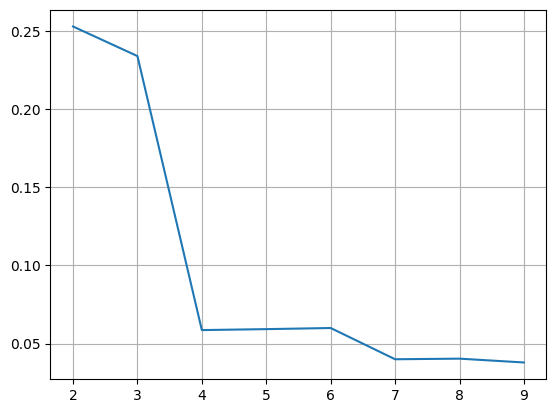

In [50]:
# 시각화하기
plt.plot(n_cluster, cluster_score)
plt.grid()
plt.show()

### 가장 적절한 클러스터링 갯수 파악 후 data 에 삽입

In [51]:
import numpy as np

best_cluster = 3
cluster = AgglomerativeClustering(n_clusters = best_cluster, linkage = 'ward') #, metric='cosine') # 최종 군집 수 선택 및 학습
cluster_label = cluster.fit_predict(doc_vectors)

df2['cluster'] = cluster_label

print(np.unique(df2['cluster']))
df.head()

[0 1 2]


,title,contents,link,date,tagged_contents,vector,cluster
0,Happy Seollal!,행복한 화요일 원호! 맛있는거 먹었니? ! 더 일찍 버블 라이브에 와줘서 고맙고 아...,https://cafe.daum.net/official--wonho/9mAq/205...,2025.01.28,"[화요일, 원호, 더, 일찍, 버블, 라이브, 사진, 어제, 내, 의사, 방문, 오...","[0.24382363, 0.7731581, -0.469956, 0.5861088, ...",0
1,유빈님에게,새벽에 인사 올립니다. 꾸벅. 편안한 밤 보내고 계신가요? 오늘도 유빈님 보고 싶어...,https://cafe.daum.net/-ohmygirl/XtXQ/186607?q=...,2024.09.16,"[새벽, 인사, 꾸벅, 밤, 오늘, 유빈, 보고, 잠시, 가족, 시간, 프롬, 이야...","[1.0627594, 0.53890544, -1.3162067, -0.1956976...",1
2,[2024.8.20.화]..출석부..제16강..我们去百货商店买东西吧。백화점에 쇼핑하...,제 강 연동문과 청유형 . 백화점에 쇼핑하러 가자. 워맨 취 바이후어샹디엔 마이 똥...,https://cafe.daum.net/beautiful5060/Ncoz/463?q...,2024.08.20,"[제, 강, 연동, 문과, 청, 유형, 백화점, 쇼핑, 워맨, 취, 바이, 후, 샹...","[0.5189565, 1.7559487, -1.2200598, 2.0170355, ...",0
3,"치자나무, 감나무, 블루에로우",다들 잘 쉬고 계시죠? 여기는 비도 조금 왔고 날씨도 흐려서 일하기는 참 좋은 날씨...,https://cafe.daum.net/daedongcome/9IGs/763?q=%...,2024.10.19,"[쉬, 계시, 비도, 조금, 날씨, 일, 날씨, 오늘, 일, 쉬, 기도, 날씨, 생...","[1.2868038, 0.46068832, -0.15367328, 0.7522161...",0
4,아린님에게,새벽에 인사 올립니다. 꾸벅. 연습은 잘 끝내셨나요? 오늘도 아린님 보고 싶어서 이...,https://cafe.daum.net/-ohmygirl/XtXQ/186794?q=...,2025.04.11,"[새벽, 인사, 꾸벅, 연습, 오늘, 린, 보고, 곳, 텔레파시, 보아, 오늘, 연...","[1.0491579, 0.6046867, -1.3205309, 0.4029353, ...",1


### 덴드로그램 - 클러스터링 과정 시각화

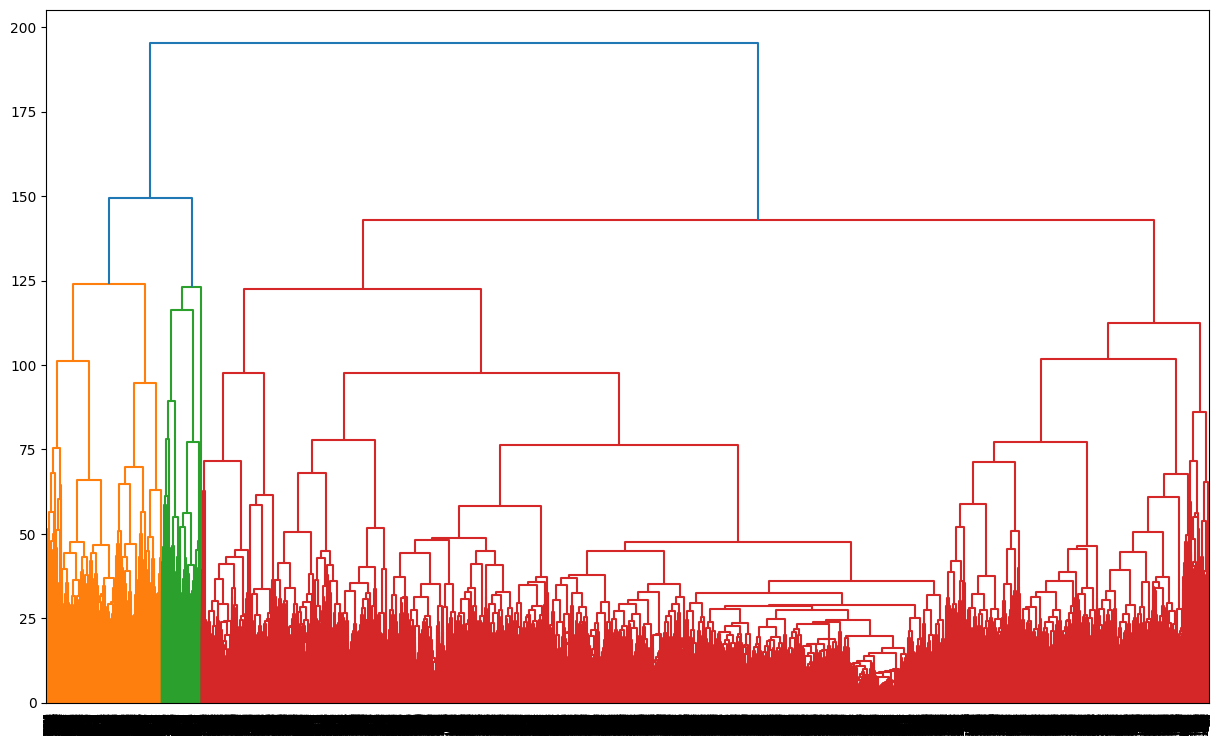

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(doc_vectors, method = 'ward') #, metric = 'cosine')

plt.figure(figsize = (15, 9))
dendrogram(linked,
           orientation = 'top',
           distance_sort = 'descending',
           show_leaf_counts = False,
           color_threshold = linked[-(best_cluster - 1), 2])
plt.show()

In [53]:
df2['cluster'].value_counts().sort_index()

cluster
0    19473
1     2242
2      763
Name: count, dtype: int64

In [ ]:
# UMAP 결과 시각화
plt.figure(figsize=(12, 10))

# c=df['cluster']: 'cluster' 열의 값에 따라 색상 매핑
# s=5: 점의 크기 조절 (데이터가 많으므로 작게 설정)
# alpha=0.7: 점의 투명도 조절 (겹치는 부분을 보기 위함)
scatter = plt.scatter(df['umap_x'],
                      df['umap_y'],
                      c=df['cluster'],
                      cmap='Spectral',
                      s=5,
                      alpha=0.7)

plt.title('UMAP Projection of Doc2Vec Vectors (Colored by Agglomerative Cluster)', fontsize=16)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.grid(True)

# 클러스터 번호에 대한 범례 추가 (클러스터 수가 너무 많지 않다면 유용)
try:
    # 고유 클러스터 번호 추출
    unique_clusters = sorted(df['cluster'].unique())
    # 범례 핸들 및 레이블 생성
    handles, labels = scatter.legend_elements(prop="colors", alpha=0.9)
    legend_labels = [f'Cluster {i}' for i in unique_clusters]
    # 범례 표시
    plt.legend(handles, legend_labels, title="Clusters", loc='best', markerscale=2)
except Exception as e:
    print(f"범례 생성 중 오류 발생 (클러스터 수가 너무 많거나 기타 문제): {e}")


plt.show()


## 해석하기 : TF-IDF

### TF-idf 계산
* 각 클러스터 마다 tfidf가 높은 워드들 찾기
* 각 클러스터들을 하나의 문서로 가정하여 tf-idf 값 추출

In [16]:
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
df['cluster'].unique()

array([0, 1, 3, 4, 2])

In [ ]:
# 클러스터 별로 모든 게시글 통합

all_documents = []
for i in df['cluster'].unique() :
    pos_tagged = df[df['cluster'] == i]['tagged_contents'] # 각 클러스터들을 하나의 문서로 가정

    # 하나의 string 으로 변환
    cluster_document = ''
    for pos in pos_tagged :
        doc = ' '.join(pos) + ' ' # 마지막에 띄어쓰기 추가
        cluster_document += doc

    all_documents.append(cluster_document)

In [55]:
# TF-IDF 객체 선언
vectorizer = TfidfVectorizer(ngram_range=(1, 2)) # bigram 사용
tfidf_matrix = vectorizer.fit_transform(all_documents)

# 사용될 단어
feature_names = vectorizer.get_feature_names_out()
# tfidf 값
value = tfidf_matrix.toarray()

# 데이터 프레임화
tfidf_df = pd.DataFrame(value, columns = feature_names)
tfidf_df

,가가,가가 가죽,가가 간다,가가 거의,가가 계곡,가가 고함,가가 급상승,가가 기도,가가 깡통,가가 남친,...,힛해 압권,힜으,힜으 나비,힝구,힝구 연말,힝구 장가,힝잉,힝잉 뒤잉,힝훙훙힝훙,힝훙훙힝훙 떵운포카
0,0.000852,0.00006,0.000000,0.000000,0.00006,0.000000,0.000000,0.000000,0.00006,0.000000,...,0.000000,0.00006,0.00006,0.000000,0.000000,0.000000,0.00006,0.00006,0.000000,0.000000
1,0.001296,0.00000,0.000122,0.000000,0.00000,0.000122,0.000000,0.000000,0.00000,0.000122,...,0.000000,0.00000,0.00000,0.000244,0.000122,0.000122,0.00000,0.00000,0.000122,0.000122
2,0.002562,0.00000,0.000000,0.000167,0.00000,0.000000,0.000167,0.000167,0.00000,0.000000,...,0.000167,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000


In [56]:
# Transpose
tfidf_df_T = tfidf_df.T
tfidf_df_T

,0,1,2
가가,0.000852,0.001296,0.002562
가가 가죽,0.000060,0.000000,0.000000
가가 간다,0.000000,0.000122,0.000000
가가 거의,0.000000,0.000000,0.000167
가가 계곡,0.000060,0.000000,0.000000
...,...,...,...
힝구 장가,0.000000,0.000122,0.000000
힝잉,0.000060,0.000000,0.000000
힝잉 뒤잉,0.000060,0.000000,0.000000
힝훙훙힝훙,0.000000,0.000122,0.000000


In [59]:
tfidf_df_T.sort_values(by = 2, ascending = False)[ : 20]

,0,1,2
생각,0.208385,0.324373,0.317572
시간,0.407680,0.263472,0.275498
문제,0.035470,0.064284,0.235987
시험,0.023114,0.014469,0.224852
공부,0.086812,0.048303,0.219926
사람,0.188359,0.328332,0.207116
정도,0.151042,0.153188,0.180907
합격,0.006746,0.005039,0.162284
회사,0.058762,0.067956,0.147602
기준,0.015268,0.015333,0.101489


### 5.2 데이터프레임으로 만들고 정렬하기

In [ ]:
for i in tfidf_df_T.columns :
    # 필터링해서 점수 높은 순으로 정렬하기
    tfidf_data = tfidf_df_T[i].sort_values(ascending = False)
    # 정렬한 데이터를 데이터프레임화 하기
    data_df = pd.DataFrame({'tfidf_word' : tfidf_data.index,
                            'tfidf_score' : tfidf_data.values })
    data_df.to_csv(f'pre_cluster{i}_tfidf.csv', encoding = 'utf-8')

In [ ]:
df.to_csv('pre_cluster_df.csv', encoding='utf-8')